In [ ]:
import pandas as pd

# Load the dataset
bank_df = pd.read_csv("bank.csv", sep=";")  # Check if separator is ';' or ','

# Display first few rows
bank_df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
# Check for missing file
print (bank_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Converting categorical variables into numeric format
bank_df = pd.get_dummies(bank_df, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Apply StandardScaler
scaler = StandardScaler()
bank_df[numeric_cols] = scaler.fit_transform(bank_df[numeric_cols])

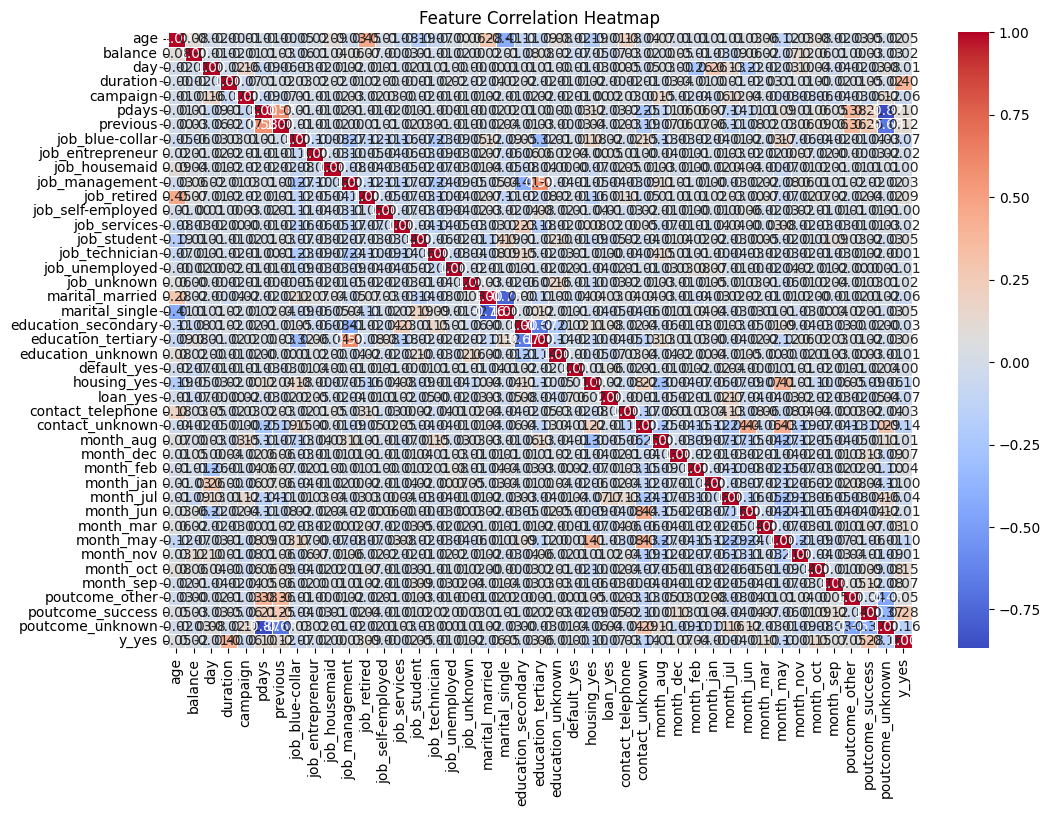

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = bank_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show(50)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target
X = bank_df.drop(columns=["y_yes"])  # Replace "y" with actual target column name
y = bank_df["y_yes"]

# Compute mutual information
mi_scores = mutual_info_classif(X, y)

# Convert to DataFrame for easy viewing
mi_scores_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information", ascending=False)

# Display top features
print(mi_scores_df.head(50))

                Feature  Mutual Information
3              duration            0.070576
40     poutcome_success            0.023978
5                 pdays            0.022109
41     poutcome_unknown            0.016389
6              previous            0.012493
0                   age            0.008285
4              campaign            0.008088
34            month_mar            0.008017
27      contact_unknown            0.007746
30            month_feb            0.007221
1               balance            0.006934
24          housing_yes            0.006613
2                   day            0.006610
26    contact_telephone            0.006577
21   education_tertiary            0.006024
35            month_may            0.005959
18      marital_married            0.004988
37            month_oct            0.004825
12    job_self-employed            0.004381
20  education_secondary            0.002786
29            month_dec            0.002632
8      job_entrepreneur         

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3616, 42)
Testing set size: (905, 42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("🔹 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

🔹 Logistic Regression Performance:
Accuracy: 0.901657458563536
Precision: 0.6
Recall: 0.2755102040816326
F1-score: 0.3776223776223776


In [ ]:
import pandas as pd
import numpy as np

# Get feature importance from Logistic Regression coefficients
feature_importance = np.abs(log_reg.coef_[0])  # Get absolute values

# Create a DataFrame for visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance as a table
from IPython.display import display  # Import display function for better output
display(feature_importance_df.head(10))  # Show top 10 most important features

,Feature,Importance
40,poutcome_success,2.307092
27,contact_unknown,1.253816
3,duration,1.118196
34,month_mar,1.105620
37,month_oct,1.105066
31,month_jan,0.925647
36,month_nov,0.856182
32,month_jul,0.769780
35,month_may,0.765303
8,job_entrepreneur,0.693686
